# HURDAT2 - Plot storms colored by wind speed

In the following example, we use the `clouddrift` library to import and plot the HURDAT2 storm trajectories colored by their observed wind speed.

In [1]:
# clouddrift imports for data and plotting
from clouddrift.datasets import hurdat2
from clouddrift.plotting import plot_ragged

# mapping and plotting imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# open the HURDAT2 dataset which is buit-in the clouddrift package
ds = hurdat2()
ds

<xarray.Dataset> Size: 13MB
Dimensions:                          (traj: 3143, obs: 84188)
Coordinates:
    id                               (traj) <U8 101kB ...
    time                             (obs) datetime64[ns] 674kB ...
Dimensions without coordinates: traj, obs
Data variables: (12/22)
    basin                            (traj) <U2 25kB ...
    year                             (traj) int64 25kB ...
    rowsize                          (traj) int64 25kB ...
    record_identifier                (obs) <U1 337kB ...
    system_status                    (obs) <U2 674kB ...
    lat                              (obs) float64 674kB ...
    ...                               ...
    max_med_wind_radius_nw           (obs) float64 674kB ...
    max_high_wind_radius_ne          (obs) float64 674kB ...
    max_high_wind_radius_se          (obs) float64 674kB ...
    max_high_wind_radius_sw          (obs) float64 674kB ...
    max_high_wind_radius_nw          (obs) float64 674kB ...
    max_sustained_wind_speed_radius  (obs) float64 674kB ...
Attributes:
    title:            HURricane DATa 2nd generation (HURDAT2)
    date_created:     2024-04-01T14:15:46.463623
    publisher_name:   NOAA AOML Hurricane Research Division
    publisher_email:  AOML.HRDWebmaster@noaa.gov
    publisher_url:    https://www.aoml.noaa.gov/hrd/hurdat/Data_Storm.html
    institution:      NOAA Atlantic Oceanographic and Meteorological Laboratory
    summary:          The National Hurricane Center (NHC) conducts a post-sto...

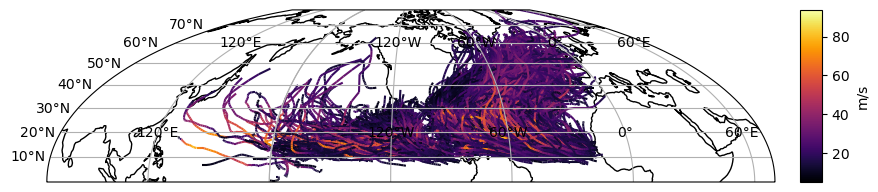

In [3]:
# now create a plot of all storms with their track color-coded by the wind speed. This uses the plot_ragged function from the clouddrift.plotting module. Plot_ragged is a wrapper 
# around plotting functions and is able to handle ragged arrays.

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=-110))
hl = plot_ragged(
    ax,
    ds.lon,
    ds.lat,
    ds.rowsize,
    colors=ds.wind_speed.values,
    transform=ccrs.PlateCarree(),
    cmap="inferno",
)
ax.set_extent([-180, 180, 0, 80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size="3%", pad=0.25, axes_class=plt.Axes)
fig.colorbar(hl, cax=cax, label="m/s")